<h1>
    <center>
        Causas de muerte en el mundo
    </center>
</h1>

<h2>
    <center>
        Miguel Ángel Castaño Ibáñez
        <br> <br>
        15/10/2020
    </center>
</h2>

<hr>

<h5>
        Programacion en Python
</h5>

A continuación se desarolla la práctica de esta asignatura


## Introducción



In [206]:
#import de todos los paquetes usados
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

#constantes
F_POPULATION = "./population.csv"
F_DEATHS = "./annual-number-of-deaths-by-cause.csv"


... Aquí se puede introducir la descripción general del ejercicio ...

## Apartado a) 

En las páginas de World in Dats puedes encontrar una tabla csv sobre el crecimiento de la población mundial por países (Population growth by country). Diseña una función que cargue dicha tabla y genere un diccionario, que para cada país y cada año, nos dé su población.

Ten cuidado, además de los países, esta tabla contiene información de regiones (Europa por ejemplo), con o sin código, y del mundo entero.


In [207]:

#Carga el dato en memoria y luego lo lee
def read_data_aux(file):
    """
    Lee un fichero csv para extraer la poblacion de cada pais 
    y/o region por año.

    Esta funcion carga el dato en memoria y a continuacion los lee 
    para introducirlos en un diccionario

    Return
    ------ 
    { str : { int : int } }
        Devuelve un mapa con el contenido del fichero, mostrando 
        cada pais, año y poblacion:
            { country : { year : amount_population } }

    Parameters
    ----------
    file : str -- ruta archivo ("./file.csv")

    Exceptions 
    ----------
    
    Example
    -------
    >>> read_all_data("./population.csv")
        {'Afghanistan': {1800: 3280000, 1801: 3280000, ... 
    
    """
    data = {}
    data_country = {}
    last_country = ''
    with open(file, 'r') as f:
        lines = f.readlines()[1:]
        for line in lines:
            #lee una linea y la transforma en lista
            line_list = line.strip().split(",")
            #si no es region
            if (line_list[1] != ''):
                if( (last_country != line_list[0]) & (last_country != '')):
                    data[last_country] = data_country
                    data_country = {}
                #dic de años : pobblacion, de un pais
                data_country[line_list[2]] = line_list[3]
                last_country = line_list[0]
        data[last_country] = data_country
        data_country = {}
        return data
    
#lee los datos sin haberlos cargado en memoria
def read_data_country(file):
    """
    Lee un fichero csv para extraer la poblacion de cada pais 
    y/o region por año.
    
    Esta funcion primero lee los datos y los va cargando 
    en memoria en memoria linea a linea
    
     Return
    ------ 
    { str : { int : int } }
        Devuelve un mapa con el contenido del fichero, mostrando 
        cada pais, año y poblacion:
            { country : { year : amount_population } }

    Parameters
    ----------
    file : str -- ruta archivo ("./file.csv")

    Exceptions 
    ----------
    
    Example
    -------
    >>> read_all_data("./population.csv")
        {'Afghanistan': {1800: 3280000, 1801: 3280000, ... 
    
    """
    data = {}
    data_country = {}
    last_country = ''
    with open(file, 'r') as f:
        next(f)
        for line in f:
            #lee una linea y la transforma en lista
            line_list = line.strip().split(",")
            #si no es region
            if ((line_list[1] != '') & (line_list[1] != "OWID_WRL")):
                if( (last_country != line_list[0]) & (last_country != '')):
                    data[last_country] = data_country
                    data_country = {}
                #dic de años : pobblacion, de un pais
                data_country[int(line_list[2])] = int(line_list[3])
                last_country = line_list[0]
        data[last_country] = data_country
        data_country = {}
        return data
                
#lee los datos de todas las regiones, incluido europa, africa...
def read_all_data(file):
    """
    Lee un fichero csv para extraer la poblacion de cada pais 
    y/o region por año.
    
    Esta funcion primero lee los datos y los va cargando 
    en memoria en memoria linea a linea
   
    Return
    ------ 
    { str : { int : int } }
        Devuelve un mapa con el contenido del fichero, mostrando 
        cada pais, año y poblacion:
            { country : { year : amount_population } }

    Parameters
    ----------
    file : str -- ruta archivo ("./file.csv")

    Exceptions 
    ----------
    
    Example
    -------
    >>> read_all_data("./population.csv")
        {'Afghanistan': {1800: 3280000, 1801: 3280000, ... 
    
    """
    data = {}
    data_country = {}
    last_country = ''
    with open(file, 'r') as f:
        next(f)
        for line in f:
            #lee una linea y la transforma en lista
            line_list = line.strip().split(",")
            #si no es region
            if((last_country != line_list[0]) & (last_country != '')):
                data[last_country] = data_country
                data_country = {}
            #dic de años : pobblacion, de un pais
            data_country[int(line_list[2])] = int(line_list[3])
            last_country = line_list[0]
        data[last_country] = data_country
        data_country = {}
        return data


Seguidamente mostramos unas cuentas pruebas de funcionamiento.

In [208]:

print("Todos los paises y/o regiones: \n")
print(read_all_data(F_POPULATION), "\n\n\n\n\n")
print("Solo los paises: \n")
print(read_data_country(F_POPULATION), "\n\n\n\n\n")
print("Todos los paises y/o regiones: \n")
print(read_data_aux(F_POPULATION))



Todos los paises y/o regiones: 

{'Afghanistan': {1800: 3280000, 1801: 3280000, 1802: 3280000, 1803: 3280000, 1804: 3280000, 1805: 3280000, 1806: 3280000, 1807: 3280000, 1808: 3280000, 1809: 3280000, 1810: 3280000, 1811: 3280779, 1812: 3282342, 1813: 3284692, 1814: 3287834, 1815: 3291770, 1816: 3296506, 1817: 3302044, 1818: 3308390, 1819: 3315547, 1820: 3323519, 1821: 3332311, 1822: 3341926, 1823: 3352368, 1824: 3363642, 1825: 3375751, 1826: 3388701, 1827: 3402494, 1828: 3417136, 1829: 3432630, 1830: 3448982, 1831: 3466194, 1832: 3483492, 1833: 3500877, 1834: 3518348, 1835: 3535906, 1836: 3553552, 1837: 3571286, 1838: 3589109, 1839: 3607021, 1840: 3625022, 1841: 3643112, 1842: 3661294, 1843: 3679565, 1844: 3697928, 1845: 3716383, 1846: 3734930, 1847: 3753569, 1848: 3772301, 1849: 3791127, 1850: 3810047, 1851: 3826140, 1852: 3842299, 1853: 3858524, 1854: 3874815, 1855: 3891173, 1856: 3907598, 1857: 3924089, 1858: 3940648, 1859: 3957274, 1860: 3973968, 1861: 3991172, 1862: 4008889, 1863:

{'Afghanistan': {1800: 3280000, 1801: 3280000, 1802: 3280000, 1803: 3280000, 1804: 3280000, 1805: 3280000, 1806: 3280000, 1807: 3280000, 1808: 3280000, 1809: 3280000, 1810: 3280000, 1811: 3280779, 1812: 3282342, 1813: 3284692, 1814: 3287834, 1815: 3291770, 1816: 3296506, 1817: 3302044, 1818: 3308390, 1819: 3315547, 1820: 3323519, 1821: 3332311, 1822: 3341926, 1823: 3352368, 1824: 3363642, 1825: 3375751, 1826: 3388701, 1827: 3402494, 1828: 3417136, 1829: 3432630, 1830: 3448982, 1831: 3466194, 1832: 3483492, 1833: 3500877, 1834: 3518348, 1835: 3535906, 1836: 3553552, 1837: 3571286, 1838: 3589109, 1839: 3607021, 1840: 3625022, 1841: 3643112, 1842: 3661294, 1843: 3679565, 1844: 3697928, 1845: 3716383, 1846: 3734930, 1847: 3753569, 1848: 3772301, 1849: 3791127, 1850: 3810047, 1851: 3826140, 1852: 3842299, 1853: 3858524, 1854: 3874815, 1855: 3891173, 1856: 3907598, 1857: 3924089, 1858: 3940648, 1859: 3957274, 1860: 3973968, 1861: 3991172, 1862: 4008889, 1863: 4027125, 1864: 4045883, 1865: 40

## Apartado b)

Como simples demostraciones, diseña expresiones o funciones que
calculen lo siguiente:
- La población española en 1800.
- La población mundial (El mundo tiene sus propios registros en la tabla
csv bajo el nombre “World” y el código “OWID_WRL”) en los años
10.000, 9.000, 8.000, …, 1.000 antes de la era común.
- El incremento de la población en Europa entre dos años dados. Esto se
ha de resolver con una función cuyos requisitos indiquen los años
posibles de uso.


In [209]:
def population(file, region, year):
    """
    Desde un fichero csv extrae la poblacion de un determinado
    pais/region en un año concreto.
    
    Return
    ------
    (int, str, int)
        Devuelve una tupla con la poblacion y los datos input:
            (amount_population, country, year)

    Parameters
    ----------
    file : str -- archivo ("./file.csv")
    region : str -- region
    year : int -- año
    
    Exceptions 
    ----------
    
    Example
    -------
    >>> population("./population.csv", 'Spain', 1800)
        (11549294, Spain, 1800) 
        
    """
    data = read_all_data(file)
    population = data[region][year]
    return population, region, year

def print_population(data):
    """
    Printea el resultado de la funcion: population(file, region, year)
    
    Return
    ------

    Parameters
    ----------
    data :  (int, str, int) -- (amount_population, country, year)
   
    Exceptions 
    ----------
    
    Example
    -------
    >>> print_population(population("./population.csv", 'Spain', 1800))
        Spain, 1800 d.C.: 11549294
        
    """
    population = data[0] 
    region = data[1] 
    year = data[2]
    if (year < 0):
        print(str(region) + ", " + str(year*(-1)) + " a.C.: " + str(population))
    else:
        print(str(region) + ", " + str(year) + " d.C.: " + str(population))
        
def increase(file, region, start_year, final_year):
    """
    Con la inflormacion del fichero csv, calcula el incremento 
    total poblacion, o decremento (-), en una determinada 
    region entre dos fechas
    
    Return
    ------
    int
        Incremento o decremento(-) de poblacion

    Parameters
    ----------
    file : str -- archivo ("./file.csv")
    region : str -- region
    start_year : int -- año inicial 
    final_year : int -- año final 
    
    Exceptions 
    ----------
    
    Example
    -------
    >>> increase("./population.csv", "Europe", 1100, 1500)
        37369768
        
    """
    data = read_all_data(file)
    start_population = data[region][start_year]
    final_population = data[region][final_year]
    increase = final_population - start_population
    #Pt = P0 ( 1 + r )t
    return increase



Seguidamente mostramos unas cuentas pruebas de funcionamiento.

In [210]:
#La población española en 1800.
print_population(population(F_POPULATION, 'Spain', 1800))
print("---------------------------")

#La población mundial (El mundo tiene sus propios 
#registros en la tabla csv bajo el nombre “World” y 
#el código “OWID_WRL”) en los años 10.000, 9.000, 
#8.000, …, 1.000 antes de la era común.
print_population(population(F_POPULATION, 'World', -10000))
print_population(population(F_POPULATION, 'World', -9000))
print_population(population(F_POPULATION, 'World', -8000))
print_population(population(F_POPULATION, 'World', -7000))
print_population(population(F_POPULATION, 'World', -6000))
print_population(population(F_POPULATION, 'World', -5000))
print_population(population(F_POPULATION, 'World', -4000))
print_population(population(F_POPULATION, 'World', -3000))
print_population(population(F_POPULATION, 'World', -2000))
print_population(population(F_POPULATION, 'World', -1000))
print_population(population(F_POPULATION, 'World', 1))
print("---------------------------")

#El incremento de la población en Europa entre 
#dos años dados. Esto se ha de resolver con una 
#función cuyos requisitos indiquen los años 
#posibles de uso.
print("Incremento de poblacion entre 1100 d.C. y 1500 d.C.:",
      increase(F_POPULATION, "Europe", 1100, 1500))



Spain, 1800 d.C.: 11549294
---------------------------
World, 10000 a.C.: 2431214
World, 9000 a.C.: 3564407
World, 8000 a.C.: 5136461
World, 7000 a.C.: 7561695
World, 6000 a.C.: 11461003
World, 5000 a.C.: 17920172
World, 4000 a.C.: 28370428
World, 3000 a.C.: 44819892
World, 2000 a.C.: 72108128
World, 1000 a.C.: 115065664
World, 1 d.C.: 188239088
---------------------------
Incremento de poblacion entre 1100 d.C. y 1500 d.C.: 37369768


## Apartado c)

Diseña ahora una función que genere una tabla de datos con las
poblaciones de los distintos países entre dos años dados como parámetros
(por ejemplo, entre 2007 y 2016). Esta tabla puede ser una simple lista
de listas, o un array (de numpy) o un dataframe (de pandas) o incluso un
diccionario.

In [211]:


#realestate = pd.read_csv('population.csv')
#realestate

def population_table(file, start_year, final_year):
    """
    A partir de la lectura del fichero csv, muestra la poblacion 
    de los paises, en un rango de dos fechas determinadas. 
    Estos son mostrados en una tabla.
    
    Return
    ------
    DataFrame
        DataFrame donde index = countries, y column_0 = start_year, 
        ... column_k = k_year, ..., column_n = final_year
        
        
    Parameters
    ----------
    file : str -- archivo ("./file.csv")
    start_year : int -- año inicial 
    final_year : int -- año final 
    
    Exceptions 
    ----------
    
    Example
    -------
    >>> population_table("./population.csv", 2018, 2019)
                               2018      2019
        Afghanistan        37172000  38042000
        Albania             2883000   2881000
        Algeria            42228000  43053000
        American Samoa        55000     55000
        Andorra               77000     77000
        ...                     ...       ...             
        
    """
    data = read_data_country(file)                      
    population_country = {}
    table = {}
    for year in range(start_year, (final_year+1)):
        for k in data.keys():
            try:
                population_country[k] = data[k][year]
            except:
                population_country[k] = 'No data'
        table[year] = population_country
        population_country = {}
    return pd.DataFrame(table)


Seguidamente mostramos unas cuentas pruebas de funcionamiento.


In [212]:
# Create DataFrame

df = population_table(F_POPULATION, 2018, 2019)
 
# Print the output 
print(df)


df2 = population_table(F_POPULATION, 1800, 1805)

# Print the output table
df2



                       2018      2019
Afghanistan        37172000  38042000
Albania             2883000   2881000
Algeria            42228000  43053000
American Samoa        55000     55000
Andorra               77000     77000
...                     ...       ...
Wallis and Futuna     12000     11000
Western Sahara       567000    582000
Yemen              28499000  29162000
Zambia             17352000  17861000
Zimbabwe           14439000  14645000

[234 rows x 2 columns]


,1800,1801,1802,1803,1804,1805
Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000
Albania,410445,411734,413026,414323,415624,416929
Algeria,2503218,2512195,2521203,2530245,2539318,2548424
American Samoa,No data,No data,No data,No data,No data,No data
Andorra,2654,2654,2654,2654,2654,2654
...,...,...,...,...,...,...
Wallis and Futuna,No data,No data,No data,No data,No data,No data
Western Sahara,No data,No data,No data,No data,No data,No data
Yemen,2593000,2593000,2593000,2593000,2593000,2593000
Zambia,747000,747000,747000,747000,747000,747000


## Apartado d)

Sería ideal mostrar la evolución de la población mundial entre dos fechas
dadas, de la era común, y compararla con la de un país (otro parámetro).
Para que los gráficos sean apreciables, convendría cambiar la escala del
país, y lógicamente esa escala dependerá de la población del país, de
manera que la función correspondiente tendrá que calcular esa escala con
algún criterio razonable.

In [213]:
def compare_population(file, scale, first_country, second_country, start_year, final_year):
    """
    A partir de la lectura del fichero csv, muestra la poblacion 
    de dos paises, comparandolos en un rango de dos fechas determinadas. 
    Estos son mostrados en una tabla.
    
    Return
    ------
    DataFrame
        DataFrame donde index = years, y column_0 = first_country, 
        column_1 = second_country
        
        
    Parameters
    ----------
    file : str -- archivo ("./file.csv")
    scale : int -- escala (1:sacale)
    first_country : str -- primer pais
    second_country : str -- segundo pais
    start_year : int -- año inicial 
    final_year : int -- año final 
    
    Exceptions 
    ----------
    
    Example
    -------
    >>> compare_population("./population.csv", 1000000, 'Spain', 'Germany', 2005, 2019)
            Spain   Germany
    2005    44.019  81.603
    2006    44.729  81.472
    2007    45.429  81.278
    2008    46.069  81.066
    ...     ...     ...
        
    """
    print("La escala de medida es de 1:"+ str(scale)+"\n")
    data = population_table(file, start_year, final_year)
    table = {}
    population_first_country = {}
    population_second_country = {}
    for year in range(start_year, (final_year+1)):
        population_first_country[year] = (data[year][first_country]) / scale
        population_second_country[year] = (data[year][second_country]) / scale
    table[first_country] = population_first_country
    table[second_country] = population_second_country
    return pd.DataFrame(table)

Seguidamente mostramos unas cuentas pruebas de funcionamiento.

In [214]:
# Create DataFrame
df3 = compare_population(F_POPULATION, 1000000, 'Spain', 'Germany', 2005, 2019)
 
# Print the output table
df3

La escala de medida es de 1:1000000



,Spain,Germany
2005,44.019,81.603
2006,44.729,81.472
2007,45.429,81.278
2008,46.069,81.066
2009,46.584,80.900
2010,46.931,80.827
2011,47.084,80.856
2012,47.063,80.973
2013,46.931,81.174
2014,46.778,81.450


## Apartado e)

Sería ideal mostrar la evolución de la población mundial entre dos fechas
dadas, de la era común, y compararla con la de un país (otro parámetro).
Para que los gráficos sean apreciables, convendría cambiar la escala del
país, y lógicamente esa escala dependerá de la población del país, de
manera que la función correspondiente tendrá que calcular esa escala con
algún criterio razonable.

Prepara una función que cargue los datos en una tabla, en el formato que
te parezca más adecuado, teniendo en cuenta su utilidad en los apartados
siguientes. Por unos pocos ejemplos de su uso similares a los planteados
en el apartado b).

In [215]:
    
def read_data_death_country(file):
    """
    A partir de la lectura del fichero csv, lee todas las causas de 
    defunciones por año para cada pais o region.
    
    Return
    ------
    DataFrame
        DataFrame donde columns[1] = countries, columns[3] = year, 
        columns[4:] = causes.
        
    Parameters
    ----------
    file : str -- archivo ("./file.csv")
    
    Exceptions 
    ----------
    
    Example
    -------
    >>> read_data_death_country("./annual-number-of-deaths-by-cause.csv")
              Entity       Code    Year   Executions  Road injuries  Cirrhosis     ...
        0     Afghanistan  AFG     1990   NaN         4575.180311    1453.044977   ...
        1     Afghanistan  AFG     1991   NaN         4762.068567    1468.860745   ...
        2     Afghanistan  AFG     1992   NaN         5531.136933    1524.528468   ...
        ...   ...          ...     ...    ...         ...            ...           ...
        6684  Zimbabwe     ZWE     2016   NaN         2731.304860    1413.648556   ...
        6685  Zimbabwe     ZWE     2017   NaN         2729.899932    1439.681856   ...
        
    """
    df = pd.read_csv(file)
    death_causes = [df.columns[0], df.columns[1], df.columns[2]]
    i = 3
    for cause in df.columns[3:]:
        #death_causes.append(cause.split(" - ")[1])
        aux = cause.split(" - ")
        if (len(aux) > 1):
            death_causes.append(aux[1])
        else:
            aux = aux[0].split(" (")
            death_causes.append(aux[0])
        i += 1
    df.columns = death_causes
    return df #, data
    
#defunciones anuales
def all_deaths_year_country(file, country, year):
    """
    A partir de la lectura del fichero csv, devuelve el total 
    de defunciones en un año, para un determinado pais.
    
    Return
    ------
    double
       Total de defunciones 
        
    Parameters
    ----------
    file : str -- archivo ("./file.csv")
    country : str -- pais
    year : int -- año
    
    Exceptions 
    ----------
    
    Example
    -------
    >>> all_deaths_year_country("./annual-number-of-deaths-by-cause.csv", "Spain", 2015)
        403503.68670149066
        
    """
    df = read_data_death_country(file)
    data = df[(df['Year'] == year ) & (df['Entity'] == country )]
    deaths = 0
    for cause in df.columns[3:]:
        if (not(pd.isnull(data.iloc[0][cause]))):
            deaths = deaths + data.iloc[0][cause]
    return deaths


def world_deaths_year(file, year, cause):
    """
    A partir de la lectura del fichero csv, devuelve el total 
    de defunciones mundiales en un año, para una determinada causa.
    
    Return
    ------
    double
       Total de defunciones 
        
    Parameters
    ----------
    file : str -- archivo ("./file.csv")
    year : int -- año
    cause : str -- causa
    
    Exceptions 
    ----------
    
    Example
    -------
    >>> world_deaths_year("./annual-number-of-deaths-by-cause.csv", 2015, "HIV/AIDS")
        1120140.8589533432
        
    """
    df = read_data_death_country(file)
    #en su lugar podriamos tomar el dato de: df['Entity'] == 'World') y sumar las causas
    data = df[(df['Year'] == year) & (pd.notnull(df['Code'])) & (df['Entity'] != 'World')]
    deaths = data[cause]
    total_d = 0
    for index in range(len(deaths)):
        if (not(pd.isnull(data.iloc[index][cause]))):
            total_d = total_d + data.iloc[index][cause]
    return total_d


#incremento o decremento de defunciones entre dos años
def increase_death(file, country, initial_year, final_year):
    """
    A partir de la lectura del fichero csv, devuelve el incremento 
    o decremento(-) de defunciones para una causa determinada 
    entre dos años.
    
    Return
    ------
    double
       Incremento de defunciones
        
    Parameters
    ----------
    file : str -- archivo ("./file.csv")
    country : str -- pais
    initial_year : int -- año
    final_year : int -- año
    
    Exceptions 
    ----------
    
    Example
    -------
    >>> increase_death("./annual-number-of-deaths-by-cause.csv", "Spain", 2014, 2015)
        1120140.8589533432
        
    """
    df = read_data_death_country(file)
    initial_data = df[(df['Year'] == initial_year ) & (df['Entity'] == country )]
    final_data = df[(df['Year'] == final_year ) & (df['Entity'] == country )]
    initial_deaths = 0
    final_deaths = 0
    for cause in df.columns[3:]:
        if (not(pd.isnull(initial_data.iloc[0][cause]))):
            initial_deaths = initial_deaths + initial_data.iloc[0][cause]
        if (not(pd.isnull(final_data.iloc[0][cause]))):
            final_deaths = final_deaths + final_data.iloc[0][cause]
    return final_deaths - initial_deaths


Seguidamente mostramos unas cuentas pruebas de funcionamiento.

In [216]:
#Dataframe de 'annual-number-of-deaths-by-cause.csv'
#read_data_death_country('./annual-number-of-deaths-by-cause.csv')
df = read_data_death_country(F_DEATHS)
#df.to_dict()

#Incremento de defunciones anuales
deaths = all_deaths_year_country(F_DEATHS, "Spain", 2015)
print("Numero de defunciones en España en el año 2015:", deaths)
deaths = all_deaths_year_country(F_DEATHS, "Spain", 2014)
print("Numero de defunciones en España en el año 2014:", deaths, "\n")

#Defunciones anuales por una causa en todo el mundo
world_deaths = world_deaths_year(F_DEATHS, 2015, "HIV/AIDS")
print("El numero de defunciones causadas por VIH o SIDA en 2015:", world_deaths, "\n")

#Incremento de defunciones anuales
increase_deaths = increase_death(F_DEATHS, "Spain", 2014, 2015)
print("El incremento de defunciones entre 2014 y 2015:", increase_deaths)


#print de todo el Dataframe
df



Numero de defunciones en España en el año 2015: 403503.68670149066
Numero de defunciones en España en el año 2014: 389540.51879475365 

El numero de defunciones causadas por VIH o SIDA en 2015: 1120140.8589533432 

El incremento de defunciones entre 2014 y 2015: 13963.167906737013


,Entity,Code,Year,Number of executions,Road injuries,Cirrhosis and other chronic liver diseases,Digestive diseases,Tuberculosis,HIV/AIDS,Diarrheal diseases,...,Neoplasms,"Fire, heat, and hot substances",Poisonings,Exposure to forces of nature,Environmental heat and cold exposure,Protein-energy malnutrition,Cardiovascular diseases,Self-harm,Interpersonal violence,Terrorism
0,Afghanistan,AFG,1990,NaN,4575.180311,1453.044977,3698.889864,4332.690583,32.098129,8817.260208,...,10061.873743,311.776082,170.742286,0.000000,226.789403,1607.703797,46498.085024,740.448500,1279.945985,12.0
1,Afghanistan,AFG,1991,NaN,4762.068567,1468.860745,3743.187336,4288.640464,37.524158,8588.463794,...,10171.333511,311.500538,172.032657,1349.999434,164.830417,1558.132316,46967.361037,762.245179,1524.641593,68.0
2,Afghanistan,AFG,1992,NaN,5531.136933,1524.528468,3894.366133,4475.257542,50.670559,8924.932420,...,10592.367581,338.614263,190.404111,614.000083,92.522183,1617.721576,48355.558515,856.912927,1684.808857,49.0
3,Afghanistan,AFG,1993,NaN,6613.963510,1598.643747,4136.479100,4909.050325,58.433049,11976.501319,...,11126.644646,382.401317,217.622614,109.999998,104.167461,1931.808553,50072.563899,975.603772,1906.959925,NaN
4,Afghanistan,AFG,1994,NaN,7341.204565,1649.977411,4318.692618,5352.634058,65.531176,13296.448475,...,11477.937575,417.717979,236.240573,160.000003,112.072652,2351.629206,51416.815442,1028.742412,2229.924043,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6681,Zimbabwe,ZWE,2013,NaN,2769.257442,1464.553211,3290.553727,13474.832150,31808.820281,5129.483596,...,10773.570087,620.024209,410.802638,125.000002,44.403541,3507.171892,16900.858090,2561.496069,1185.280625,1.0
6682,Zimbabwe,ZWE,2014,NaN,2728.371376,1428.155866,3284.347650,12924.005409,24602.870777,4946.075661,...,10856.786196,609.387024,406.351616,8.500000,43.073231,3380.319464,16755.843066,2554.170577,1173.474099,0.0
6683,Zimbabwe,ZWE,2015,NaN,2725.852725,1413.581787,3303.600304,12490.005497,20841.883197,4737.642966,...,11005.829309,599.262647,404.641729,15.500000,42.139866,3263.941226,16691.109079,2583.031015,1175.264012,NaN
6684,Zimbabwe,ZWE,2016,NaN,2731.304860,1413.648556,3345.340586,12169.197080,18491.624779,4602.100769,...,11240.734416,596.297688,405.940831,31.000000,41.675497,3188.723249,16781.946571,2619.243794,1178.128366,NaN


## Apartado f)

Diseña una función que, para una causa de muerte (“Road injuries” por
ejemplo), calcule las tasas de muerte en un país (“Spain” por ejemplo) y
año (2015 por ejemplo), donde una tasa está calculada como el número
de muertes por esa causa en ese país y año por cada 10000 habitantes.

In [217]:
def cause_deaths_year_country(file_main, file_aux, country, cause, year):
    """
    A partir de la lectura del fichero csv, calcula las tasa de muerte en un país, 
    para una determinada causa en un año
    
    Return
    ------
    (double, double)
       Devuelve una dupla con el ratio de defunciones por cada 10000 habitantes 
       y el total.
           (rate, deaths)
        
    Parameters
    ----------
    file_main : str -- archivo ("./file.csv")
    file_aux : : str -- archivo ("./file.csv")
    country : str -- pais
    cause : str -- causa
    year : int -- año
    
    Exceptions 
    ----------
    
    Example
    -------
    >>> cause_deaths_year_country("./annual-number-of-deaths-by-cause.csv", 
                                    "./population.csv", "Spain", "Road injuries", 2015)
        (0.0005352789490622048, 2498.2539110631224)
        
    """
    df = read_data_death_country(file_main)
    data = df[(df['Year'] == year ) & (df['Entity'] == country )]
    deaths = data.iloc[0][cause]
    pop, _, _ = population(file_aux, country, year)
    rate = (deaths/pop) * 10.000
    return rate, deaths

##terminar ejercicios apartado b)##
    

Seguidamente mostramos unas cuentas pruebas de funcionamiento.

In [218]:
rate, deaths = cause_deaths_year_country(F_DEATHS, F_POPULATION, "Spain", "Road injuries", 2015)
print("Las muerte en 2015 en España por accidentes de trafico fueron:", deaths)
print("Con una tasa de muertes por cada 10.000 habitantes:", rate)
#spain_road_inj_2015


Las muerte en 2015 en España por accidentes de trafico fueron: 2498.2539110631224
Con una tasa de muertes por cada 10.000 habitantes: 0.0005352789490622048


## Apartado g)

Algunas de las funciones anteriores o pequeñas variantes suyas nos
resultarán útiles para generar un gráfico adecuado que nos permita
comparar la mortalidad por una causa en un año, en una colección de
países.

In [219]:
#dimensiones de ta tabla : [w,h]
plt.rcParams['figure.figsize'] = [35, 20]
#plt.rcParams['figure.dpi'] = 200 

#defunciones anuales
def plot_cause_deaths_year_by_country(file, cause, year):
    """
    A partir de la lectura del fichero csv, pinta un grafico de 
    todos los paises del numero de defunciones, para una causa 
    y año concretos. Por último, devuelve una tabla
    
    Return
    ------
    DataFrame
        DataFrame donde columns[1] = countries, columns[3] = death_by_cause.
        
        
    Parameters
    ----------
    file : str -- archivo ("./file.csv")
    cause : str -- causa
    year : int -- año
    
    Exceptions 
    ----------
    
    Example
    -------
    >>> plot_cause_deaths_year_by_country(./annual-number-of-deaths-by-cause.csv",
                                            "Tuberculosis", 2015)
        (plot graph)
             Entity       Tuberculosis
        25   Afghanistan  3681.705884
        53   Albania      11.698612
        81   Algeria      432.006708
        ...  ...          ...
        
    """
    country = 'Entity'
    df = read_data_death_country(file)
    data = df[ (df['Year'] == year) & (pd.notnull(df['Code'])) & (df['Entity'] != 'World')] 
    data = data[[country, cause]]
    #sb.barplot(x = country, y = cause, data=data)
    
    x_pos = np.arange(len(data[country]))
    fig, ax = plt.subplots()
    #ax.yaxis.set_major_formatter(formatter)
    plt.bar(x_pos, data[cause], alpha=0.5)
    plt.xticks(x_pos, data[country], rotation='vertical')
    plt.xlabel('Countries')
    plt.ylabel('Number of deaths')
    plt.title('Deaths by ' + cause + ' in ' + str(year))
    plt.show()
    
    return data

Seguidamente mostramos unas cuentas pruebas de funcionamiento.

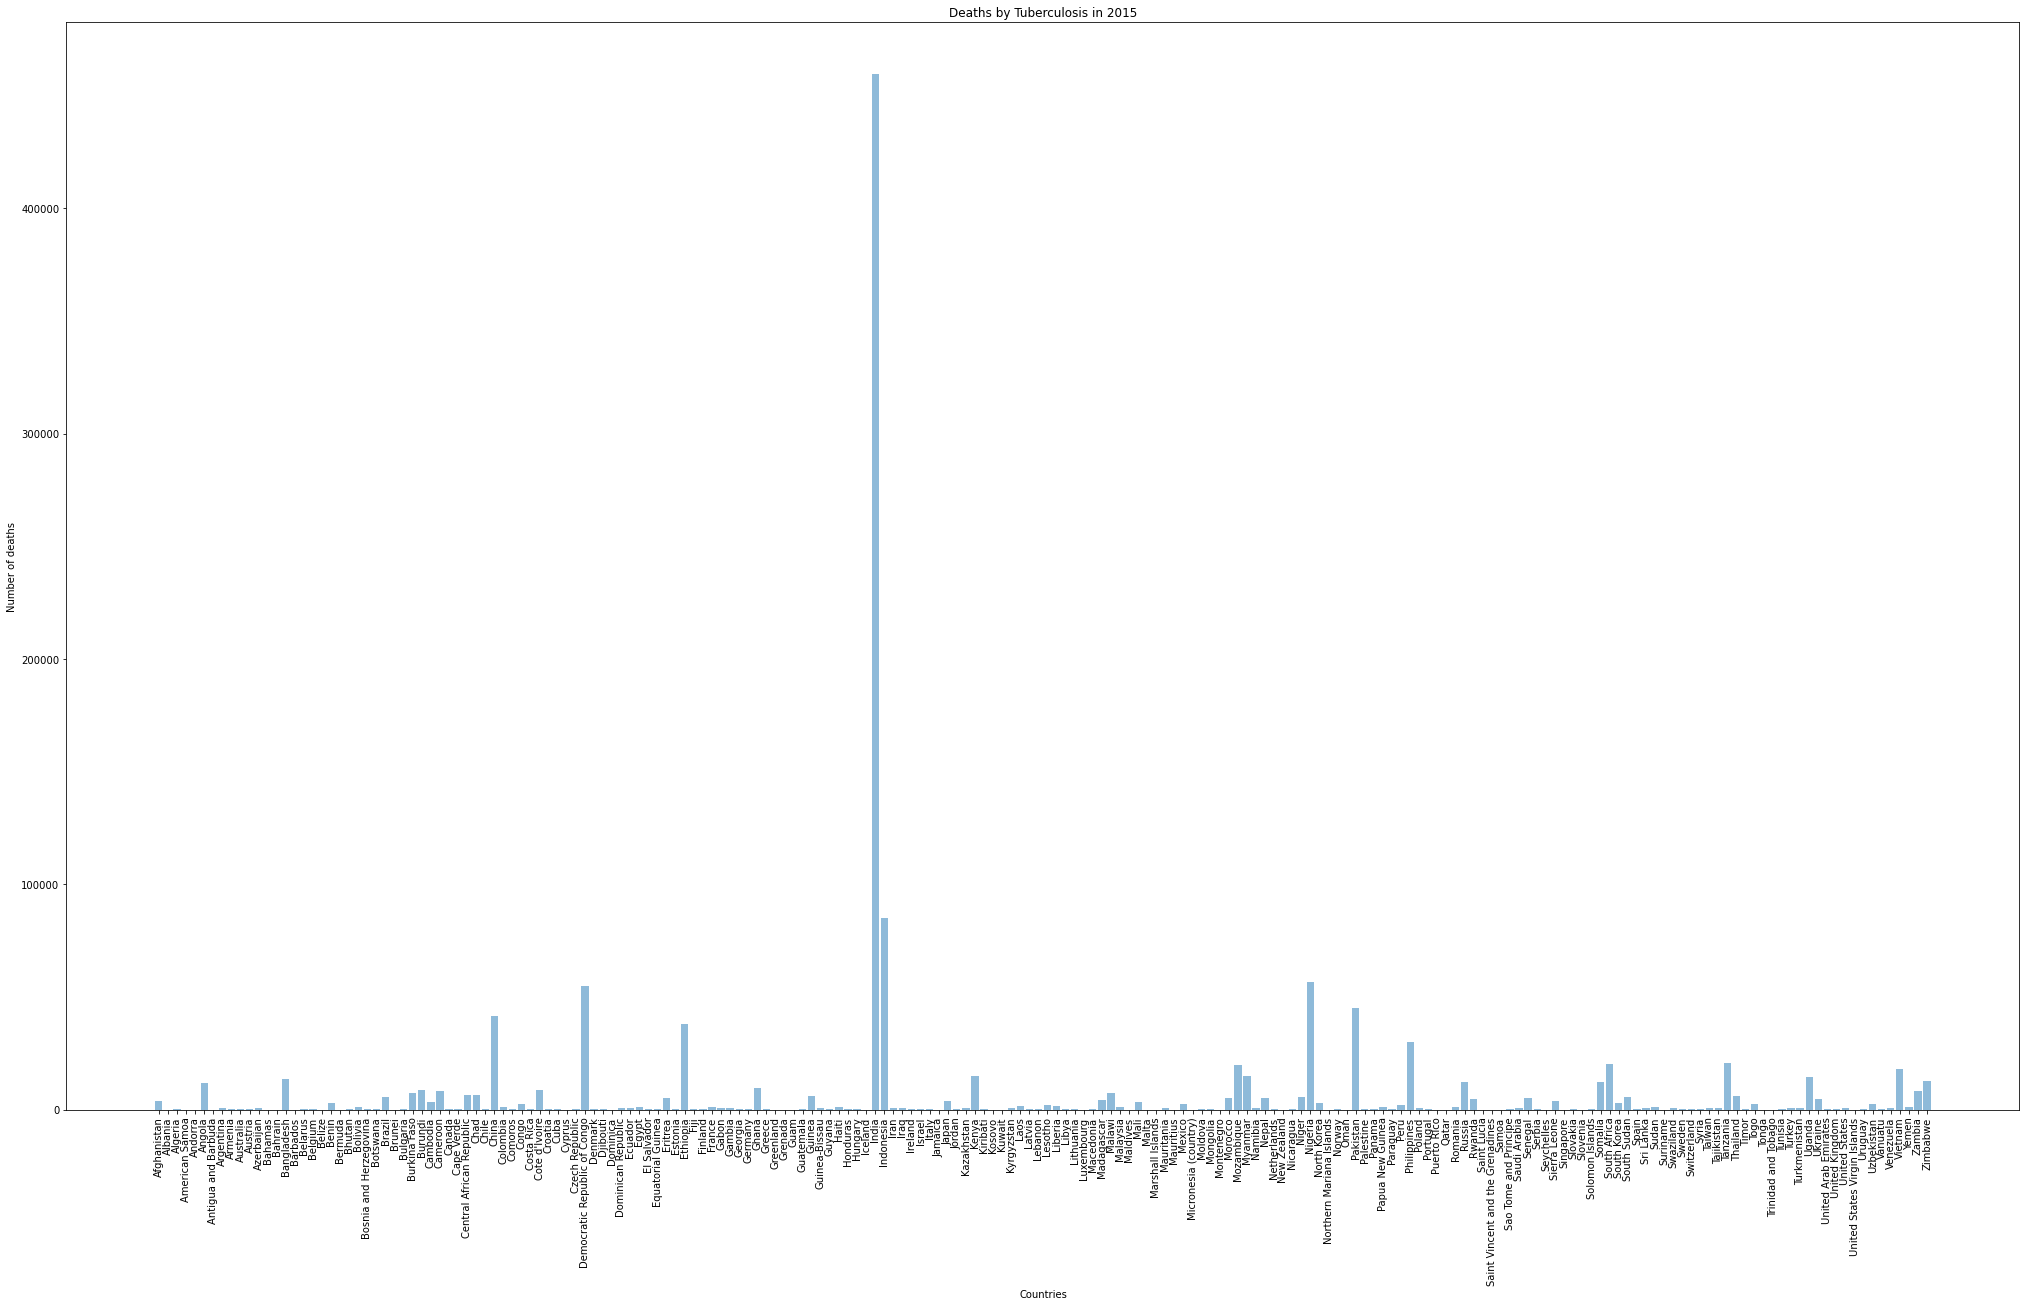

,Entity,Tuberculosis
25,Afghanistan,3681.705884
53,Albania,11.698612
81,Algeria,432.006708
109,American Samoa,0.352673
165,Andorra,0.341054
...,...,...
6427,Venezuela,743.434177
6455,Vietnam,18200.202601
6609,Yemen,967.140410
6655,Zambia,8173.979718


In [220]:
plot_cause_deaths_year_by_country(F_DEATHS ,"Tuberculosis", 2015)


## Apartado h)

Desearíamos saber el total de muertes en un año dado por cada causa.
Esto se puede calcular de varias maneras. Te pido ahora que resuelvas
este problema con un programa iterativo, que recorre países y va
acumulando en un diccionario las cantidades de cada causa.

In [221]:
#defunciones anuales
def cause_deaths_year(file, year):
    """
    A partir de la lectura del fichero csv, devuelve todas las defunciones 
    por cada causa en un año.
    
    Return
    ------
    { str : int }
       Devuelve un diccionario donde la key es la causa y el valor en numero 
       de defunciones en el año seleccionado.
            { cause : deaths }
        
    Parameters
    ----------
    file : str -- archivo ("./file.csv")
    year : int -- año
    
    Exceptions 
    ----------
    
    Example
    -------
    >>> cause_deaths_year(./annual-number-of-deaths-by-cause.csv", 2007)
        { 'Number of executions': 1248,
         'Road injuries': 1278090,
         'Cirrhosis and other chronic liver diseases': 1146838,
         'Digestive diseases': 2056106,
         ... 
         }
        
    """
    data_dic = {}
    df = read_data_death_country(file)
    data = df[ (df['Year'] == year) & (df['Entity'] != 'World') & ( pd.notnull(df['Code'])) ] 
    causes = data.columns[3:]
    for cause in causes:
        data_dic[cause] = 0
        for country in range(len(data['Entity'])):
            if ( pd.notnull(data.iloc[country][cause]) ):
                data_dic[cause] = data_dic[cause] + int(data.iloc[country][cause]) 
    return data_dic

Seguidamente mostramos unas cuentas pruebas de funcionamiento.

In [222]:
print("Defunciones en 2007:")
cause_deaths_year(F_DEATHS, 2007)


Defunciones en 2007:


{'Number of executions': 1248,
 'Road injuries': 1278090,
 'Cirrhosis and other chronic liver diseases': 1146838,
 'Digestive diseases': 2056106,
 'Tuberculosis': 1388871,
 'HIV/AIDS': 1918080,
 'Diarrheal diseases': 1881208,
 'Intestinal infectious diseases': 179298,
 'Lower respiratory infections': 2668414,
 'Meningitis': 360130,
 'Drowning': 354826,
 'Alzheimer disease and other dementias': 1713163,
 'Parkinson disease': 245108,
 'Alcohol use disorders': 179543,
 'Drug use disorders': 103646,
 'Malaria': 895309,
 'Maternal disorders': 254427,
 'Neonatal disorders': 2348280,
 'Nutritional deficiencies': 354148,
 'Diabetes mellitus': 1013488,
 'Chronic kidney disease': 916913,
 'Chronic respiratory diseases': 3361679,
 'Conflict and terrorism': 59394,
 'Hepatitis': 139810,
 'Neoplasms': 7580333,
 'Fire, heat, and hot substances': 130669,
 'Poisonings': 77075,
 'Exposure to forces of nature': 15385,
 'Environmental heat and cold exposure': 61249,
 'Protein-energy malnutrition': 313037,

## Apartado i)

Te pido ahora que resuelvas el ejercicio anterior con la técnica mapreduce.

Codigo externo

In [288]:
def read_data_mr(file, year):
    """
    A partir de la lectura del fichero csv generamos 
    un fichero con los datos filtrados para usar la funcion 
    map reduce. Se genra './deaths-filter-by-year.txt'.
    
    Return
    ------
        
    Parameters
    ----------
    file : str -- archivo ("./file.csv")
    year : int -- año
    
    Exceptions 
    ----------
    
    Example
    -------
    >>> read_data_mr("./annual-number-of-deaths-by-cause.csv", 2012)
        deaths-filter-by-year.txt
        
    """
    with open('./deaths-filter-by-year.txt','w') as fw:
        with open(file, 'r') as f:
            for line in f:
                fields = line.split(',')
                if ((fields[2] == str(year))&(fields[1]!="")&(fields[1]!="OWID_WRL")):
                    fw.write(line)
        #fw.close()

def read_result_mr(main_file, result_file, year):
    """
    Convierte en un diccionario el resultado de map-reduce
    
    Return
    ------
    data
        { str : int}
            Devielve un diccionario
                { cause : number_of_deaths }
        
        
    Parameters
    ----------
    file : str -- archivo ("./file.csv")
    year : int -- año
    
    Exceptions 
    ----------
    
    Example
    -------
    >>> read_data_mr("./annual-number-of-deaths-by-cause.csv", 2012)
        {'Cardiovascular diseases': '14625065',
        'Self-harm': '782153',
        'Interpersonal violence': '402550',
        'Terrorism': '12822',
        'Road injuries': '1278090',
        ...
        }
        
    """
    df = read_data_death_country(main_file)
    causes = df.columns
    data = {}
    with open(result_file, 'r') as f:
        for line in f:
            line_list = line.split()
            data[causes[int(line_list[0])]] = line_list[1]
    return data

In [289]:
read_data_mr("./annual-number-of-deaths-by-cause.csv", 2007)
read_result_mr("./annual-number-of-deaths-by-cause.csv", "./result.txt", 2007)


{'Cardiovascular diseases': '14625065',
 'Self-harm': '782153',
 'Interpersonal violence': '402550',
 'Terrorism': '12822',
 'Road injuries': '1278090',
 'Neonatal disorders': '2348280',
 'Nutritional deficiencies': '354148',
 'Diabetes mellitus': '1013488',
 'Chronic kidney disease': '916913',
 'Chronic respiratory diseases': '3361679',
 'Conflict and terrorism': '59394',
 'Hepatitis': '139810',
 'Neoplasms': '7580333',
 'Fire, heat, and hot substances': '130669',
 'Poisonings': '77075',
 'Number of executions': '1248',
 'Exposure to forces of nature': '15385',
 'Environmental heat and cold exposure': '61249',
 'Protein-energy malnutrition': '313037',
 'Parkinson disease': '245108',
 'Alcohol use disorders': '179543',
 'Drug use disorders': '103646',
 'Malaria': '895309',
 'Maternal disorders': '254427',
 'Cirrhosis and other chronic liver diseases': '1146838',
 'Digestive diseases': '2056106',
 'Tuberculosis': '1388871',
 'HIV/AIDS': '1918080',
 'Diarrheal diseases': '1881208',
 'Int

## Apartado j)

Diseña una colección de funciones que trabajan sucesivamente, cargando
los datos, mostrando una parte pequeña de los mismos y, finalmente,
generando una tabla como la de la Figura 1.

In [223]:
#dimensiones de ta tabla : [w,h]
plt.rcParams['figure.figsize'] = [10, 10]

def plot_cause_deaths_year(file, year):
    """
    A partir de la lectura del fichero csv con la funcion del 
    ejercicio anterior, pinta una grafica de barras horizontal.
    En este grafico se representa el total de muertes mundiales 
    por causas.
    
    Return
    ------
        
    Parameters
    ----------
    file : str -- archivo ("./file.csv")
    year : int -- año
    
    Exceptions 
    ----------
    
    Example
    -------
    >>> plot_cause_deaths_year(./annual-number-of-deaths-by-cause.csv", 2007)
        (plot graph)
        
    """
    data = cause_deaths_year(file, year)
    keys = []
    values = []
    for k, v in data.items():
        keys.append(k)
        values.append(v)
        
    data_list = zip(values, keys)
    data_list = sorted(data_list, reverse = False)
    keys.clear()
    values.clear()
    values, keys = zip(*data_list)
    
    y_pos = np.arange(len(data_list))
    plt.barh(y_pos, values, alpha=0.5)#, height=1)
    plt.yticks(y_pos, keys)
    plt.xlabel(' x(10) Million of deaths')
    #plt.ylabel('Causes of deaths')
    plt.title('Number of deaths by cause')
    
    plt.show()

    
    #return data_list

    

Seguidamente mostramos unas cuentas pruebas de funcionamiento.

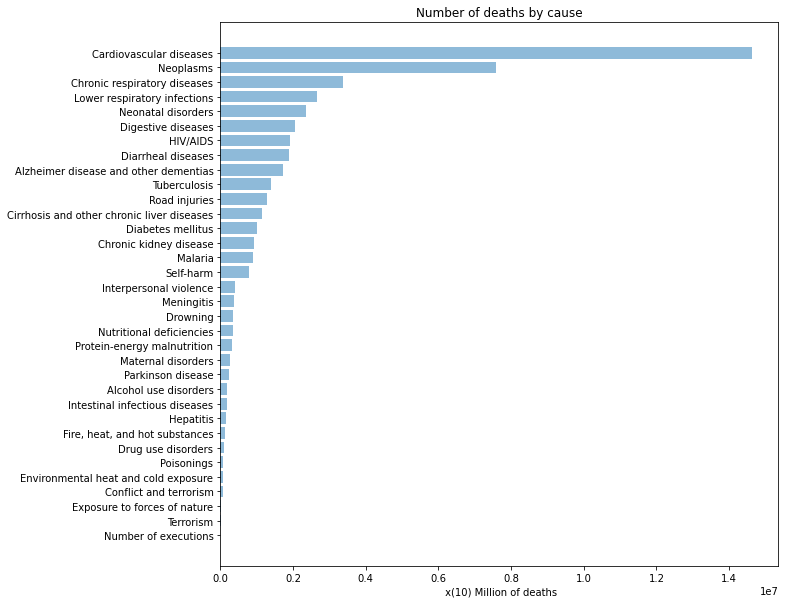

In [224]:
plot_cause_deaths_year(F_DEATHS, 2007)


## Apartado k)

En un gráfico como el anterior, los datos de mayor orden no permiten ver
bien los datos de órdenes más pequeños. Por eso es mejor usar una tabla
logarítmica (o más precisamente logarítmica-lineal). En ella, la escala en el
eje horizontal no crece linealmente (2 millones, 4 millones, 6, 8, 10, etc.),
sino exponencialmente (10^3, 10^4, 10^5, 10^6, etc.), lo que equivale visualmente a
suavizar mucho las barras de órdenes mayores logarítmicamente.

k) Te pido hacer esto, obteniendo un gráfico similar al presentado, pero:

k.1) Versión básica: con los datos mundiales, para el año elegido (un
parámetro)

k.2) Vesión intermedia: donde el país elegido sea también un parámetro

k.3) Versión más ambiciosa: comparando la tasa de los datos mundiales
con la de un país (cantidades por millón de habitantes mundial y del
país, en el año elegido).Elige la versión más ambiciosa que puedas realizar.

In [225]:
plt.rcParams['figure.figsize'] = [10, 10]

##K1
def plot_cause_deaths_year_log(file, year):
    """
    A partir de la lectura del fichero csv con la funcion del 
    ejercicio anterior, pinta una grafica de barras horizontal,
    con crecimiento logaritmico en el eje y. En este grafico
    se representa el total de muertes mundiales por causas.
    
    Return
    ------
        
    Parameters
    ----------
    file : str -- archivo ("./file.csv")
    year : int -- año
    
    Exceptions 
    ----------
    
    Example
    -------
    >>> plot_cause_deaths_year_log(./annual-number-of-deaths-by-cause.csv", 2007)
        (plot graph)
        
    """
    data = cause_deaths_year(file, year)
    keys = []
    values = []
    for k, v in data.items():
        keys.append(k)
        values.append(v)
        
    data_list = zip(values, keys)
    data_list = sorted(data_list, reverse = False)
    keys.clear()
    values.clear()
    values, keys = zip(*data_list)
    
    y_pos = np.arange(len(data_list))
    plt.barh(y_pos, values, alpha=0.5)#, height=1)
    plt.yticks(y_pos, keys)
    
    plt.xlabel('Number of deaths')
    #plt.ylabel('Causes of deaths')
    plt.title('Number of deaths by cause')
    plt.xscale('log')
    
    plt.show()

    
##k2
#defunciones anuales
def cause_deaths_year_in_country(file, year, country):
    """
    A partir de la lectura del fichero csv, devuelve todas las defunciones 
    por cada causa en un año para el pais indicado.
    
    Return
    ------
    { str : int }
        Devuelve un diccionario donde la key es la causa y el valor en numero 
        de defunciones en el año seleccionado.
            { cause : deaths }
        
    Parameters
    ----------
    file : str -- archivo ("./file.csv")
    year : int -- año
    country : str -- pais
    
    Exceptions 
    ----------
    
    Example
    -------
    >>> cause_deaths_year_in_country(./annual-number-of-deaths-by-cause.csv", 
                                                2007, "Spain")
        {'Number of executions': nan,
        'Road injuries': 4441.311154638463,
        'Cirrhosis and other chronic liver diseases': 8375.20561359896,
        'Digestive diseases': 19922.754288795288,
        'Tuberculosis': 515.9858864520971,
        'HIV/AIDS': 1339.0755249334973,
        'Diarrheal diseases': 613.2629164337483,
        ...
        }
        
    """
    df = read_data_death_country(file)
    data = df[(df['Year'] == year ) & (df['Entity'] == country )]
    data_dic = {}
    causes = data.columns[3:]
    for cause in causes:
        data_dic[cause] = data.iloc[0][cause]
    return data_dic
    

def plot_cause_deaths_year_in_country_log(file, year, country):
    """
    A partir de la lectura del fichero csv con la funcion del 
    ejercicio anterior, pinta una grafica de barras horizontal,
    con crecimiento logaritmico en el eje y. En este grafico
    se representa el total de muertes en un pais concreto por 
    cada causas.
    
    Return
    ------
    
        
    Parameters
    ----------
    file : str -- archivo ("./file.csv")
    year : int -- año
    country : str -- pais
    
    Exceptions 
    ----------
    
    Example
    -------
    >>> plot_cause_deaths_year_in_country_log(./annual-number-of-deaths-by-cause.csv", 
                                                2007, "Spain")
        (plot graph)
        
    """
    data = cause_deaths_year_in_country(file, year, country)
    keys = []
    values = []
    for k, v in data.items():
        keys.append(k)
        values.append(v)
        
    data_list = zip(values, keys)
    data_list = sorted(data_list, reverse = False)
    keys.clear()
    values.clear()
    values, keys = zip(*data_list)
    
    y_pos = np.arange(len(data_list))
    plt.barh(y_pos, values, alpha=0.5)#, height=1)
    plt.yticks(y_pos, keys)
    plt.xlabel('Number of deaths in ' + country)
    #plt.ylabel('Causes of deaths')
    plt.title('Number of deaths by cause in ' + country)
    plt.xscale('log')
    #plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
    
    plt.show()
    
    

Seguidamente mostramos unas cuentas pruebas de funcionamiento.

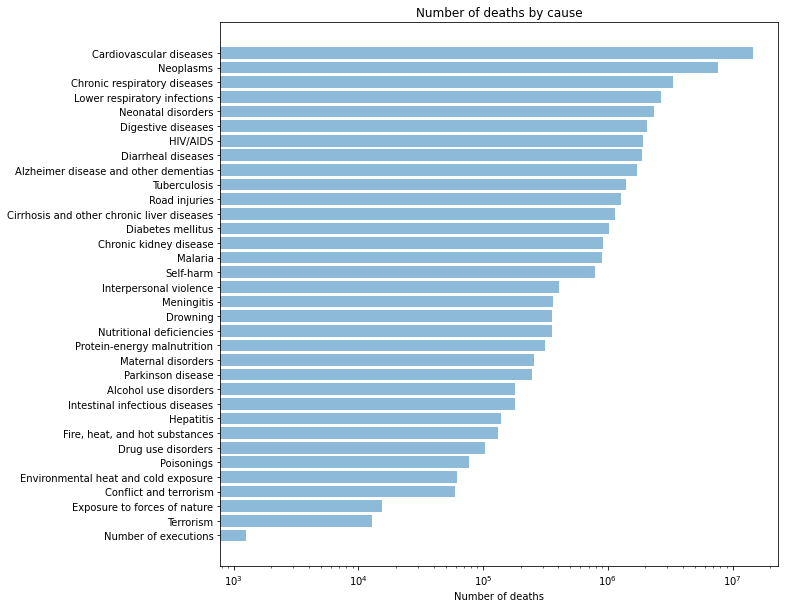

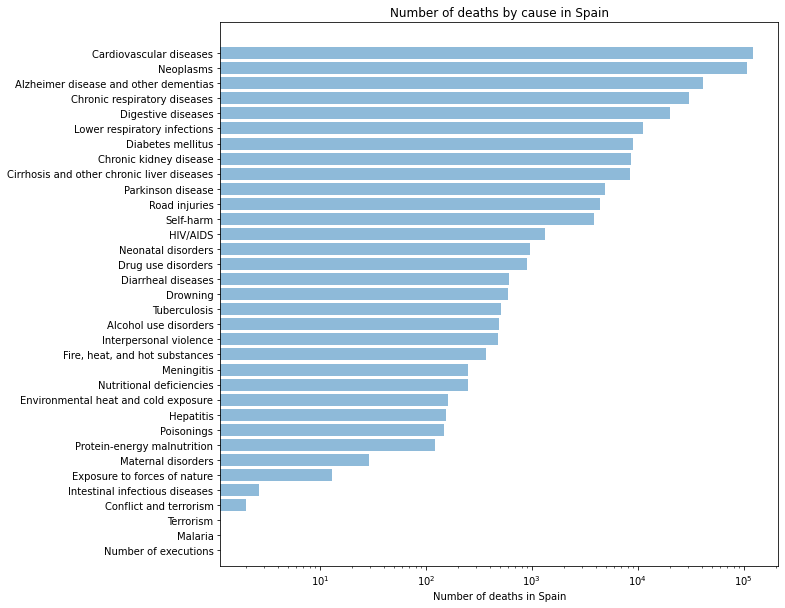


Defunciones en 2007 en España


{'Number of executions': nan,
 'Road injuries': 4441.311154638463,
 'Cirrhosis and other chronic liver diseases': 8375.20561359896,
 'Digestive diseases': 19922.754288795288,
 'Tuberculosis': 515.9858864520971,
 'HIV/AIDS': 1339.0755249334973,
 'Diarrheal diseases': 613.2629164337483,
 'Intestinal infectious diseases': 2.66485517542,
 'Lower respiratory infections': 11228.77385153229,
 'Meningitis': 250.32700913952468,
 'Drowning': 598.4215628751617,
 'Alzheimer disease and other dementias': 40922.39401186886,
 'Parkinson disease': 4877.249276206144,
 'Alcohol use disorders': 493.7500972528725,
 'Drug use disorders': 893.4836742834817,
 'Malaria': 0.0,
 'Maternal disorders': 29.000625984438944,
 'Neonatal disorders': 954.5081484745996,
 'Nutritional deficiencies': 249.8238272034504,
 'Diabetes mellitus': 8973.581942664623,
 'Chronic kidney disease': 8613.088893358066,
 'Chronic respiratory diseases': 30100.1692789051,
 'Conflict and terrorism': 2.000000000031104,
 'Hepatitis': 155.0699

In [228]:
##k1
plot_cause_deaths_year_log(F_DEATHS, 2007)

##k2
plot_cause_deaths_year_in_country_log(F_DEATHS, 2007, "Spain")
#print dic
print("\nDefunciones en 2007 en España")
cause_deaths_year_in_country(F_DEATHS, 2007, "Spain")


<hr>

### Datos personales

-   **Apellidos:** Castaño Ibáñez
-   **Nombre:** Miguel Ángel
-   **Email:** miguecasta97@gmail.com
-   **Fecha:** 15/10/2020

<hr>

### Ficha de autoevaluación

**Comentarios**: Creo que mi evaluacion con respecto a este ejercicio debe de ser alta, ya que he realizado todos los ejercicios, aunque quizas con mas conocimiento del lenguaje, podrian haber sido mas eficientes

|Apartado|Calificación|Comentario|
|-|-|-|
|a) |1.5 / 1.5  |Completamente resuelto |
|b) |0.75 / 1.5 |Resuelto a medias |
|c) |0.0 / 1.5  |No he logrado el correcto funcionamiento |
|...|... / ...  |... |
|**Total** |**8.75** / 10.0|**Notable**|


**Nota**: La valoración de cada apartado será la siguiente:

- Apartados a, b, c, d, e: 1.5 puntos
- Apartados f, g, h, i: 0.5 puntos
- Apartado j: 0.4 puntos
- Apartado k: 0.1 puntos


### Ayuda recibida y fuentes utilizadas

He usado la documentacion oficial de python y algunas consultas realizadas en https://stackoverflow.com/

### Comentario adicional

Creo que la tarea me ha ayudado a entender mejor el lenguaje de programacion python, aun que con algunas dificultades en el map reduce, a persar de haberlo estudiado en mis estudios de grado, creo que es un tema complejo y que necesita estudiarse mas a fondo.